Breast Cancer Dataset Tutorial

Introduction

The Breast Cancer dataset is a classic binary classification problem. It contains 569 samples with 30 features, such as radius, texture, perimeter, etc. The goal is to predict whether a tumor is malignant (1) or benign (0).

Code Implementation

Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

Load Dataset

In [4]:
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = malignant, 1 = benign)

Split Dataset into Training and Testing Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Function to Evaluate Models

In [6]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

Train and Evaluate Models

Decision Tree

In [7]:
print("Decision Tree:")
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

Decision Tree:
Accuracy: 0.95
ROC AUC: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Random Forest

In [8]:
print("Random Forest:")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

Random Forest:
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



XGBoost

In [48]:
print("XGBoost:")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test)

XGBoost:
Accuracy: 0.97
ROC AUC: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



C:\Users\Techno Matique\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [22:30:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


K-Nearest Neighbors (KNN)

In [10]:
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test)

K-Nearest Neighbors (KNN):
Accuracy: 0.96
ROC AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



Hyperparameter Tuning with GridSearchCV

Import Libraries

In [49]:
from sklearn.model_selection import GridSearchCV

Define Model and Parameter Grid

1. Import Libraries

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

2. Load Dataset

In [51]:
data = load_breast_cancer()
X = data.data
y = data.target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3. Define the Model and Parameter Grid

random forest


In [26]:
# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split a node
}

Decision Tree

In [23]:
# Définir la grille de paramètres
param_grid_dt = {
    'max_depth': [ None, 5, 10, 15 ,20],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons pour diviser un nœud
}

XGBoost

In [52]:
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Définir la grille de paramètres
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [3, 5, 7],           # Profondeur maximale des arbres
    'learning_rate': [0.01, 0.1, 0.2], # Taux d'apprentissage
    'min_samples_split': [2, 5, 10],  # Nombre minimal d'échantillons pour diviser un nœud
}

4. Perform Grid Search

random forest

In [35]:
param_grid=param_grid_rf
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to evaluate
    cv=5,               # Number of cross-validation folds
    verbose=1,          # Print progress
    n_jobs=-1           # Use all available CPU cores
)


# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

XGBoost

In [53]:
#xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)


5. Evaluate the Best Model

random forest

In [38]:
# Get the best model
best_model = grid_search.best_estimator_


# Evaluate on the test set
y_pred = best_model.predict(X_test)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



xgboost

In [54]:
#fit the model
grid_search_xgb.fit(X_train, y_train)
#get the best one
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



C:\Users\Techno Matique\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [22:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_split", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tracer l'importance des caractéristiques

random forest

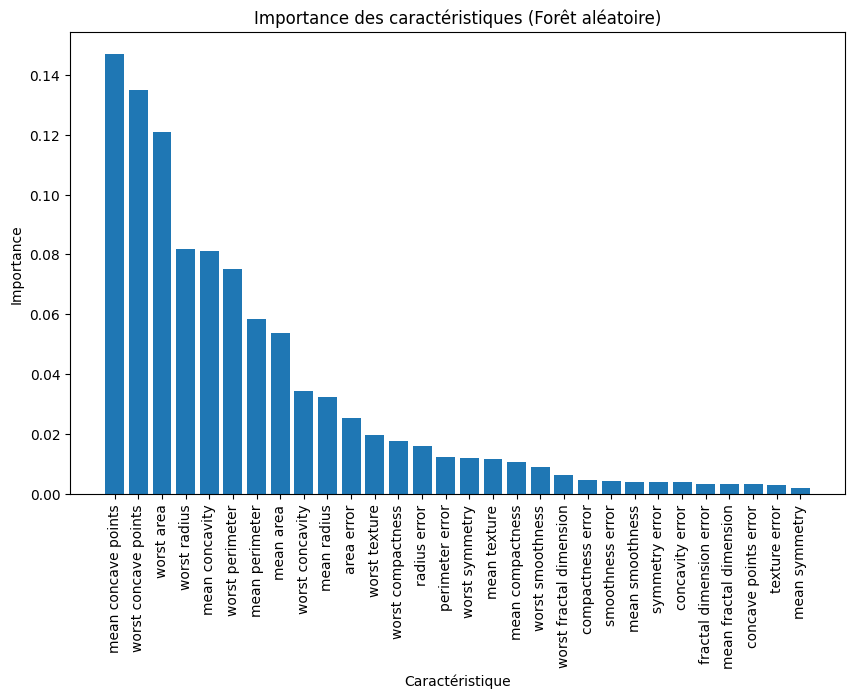

In [55]:
import matplotlib.pyplot as plt

# Tracer l'importance des caractéristiques pour la forêt aléatoire
importances = rf_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importance des caractéristiques (Forêt aléatoire)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Caractéristique")
plt.ylabel("Importance")
plt.show()

xgboost

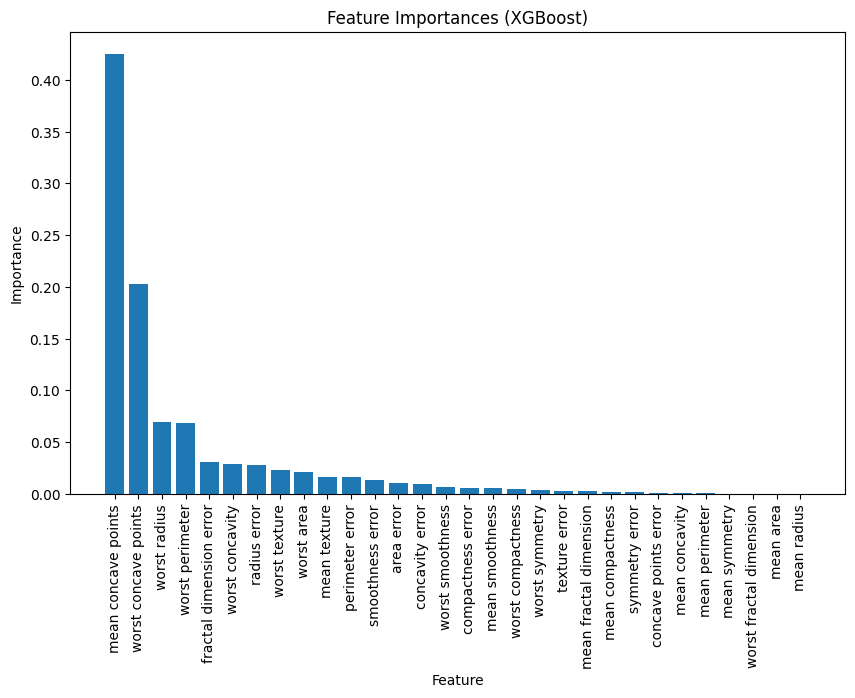

In [56]:
importances = best_xgb_model.feature_importances_
feature_names = data.feature_names
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

Tracer la courbe ROC

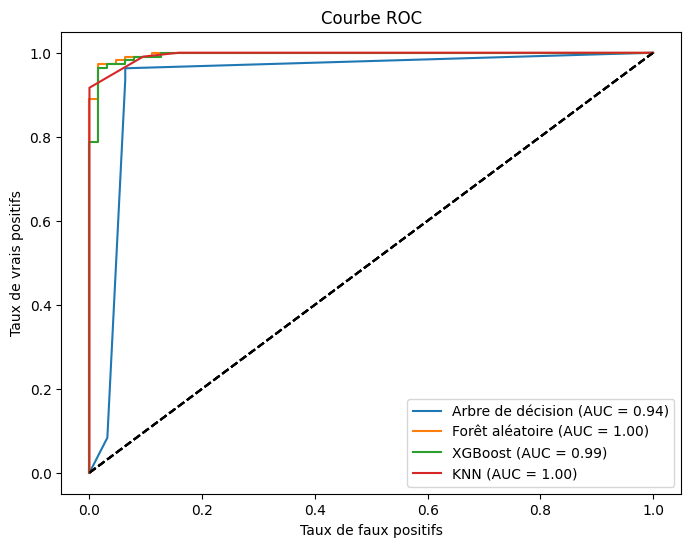

In [57]:
from sklearn.metrics import roc_curve, auc

# Fonction pour tracer la courbe ROC
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC')
    plt.legend(loc='lower right')

# Tracer les courbes ROC pour tous les modèles
plt.figure(figsize=(8, 6))
plot_roc_curve(dt_model, X_test, y_test, 'Arbre de décision')
plot_roc_curve(rf_model, X_test, y_test, 'Forêt aléatoire')
plot_roc_curve(xgb_model, X_test, y_test, 'XGBoost')
plot_roc_curve(knn_model, X_test, y_test, 'KNN')
plt.show()

xgboost

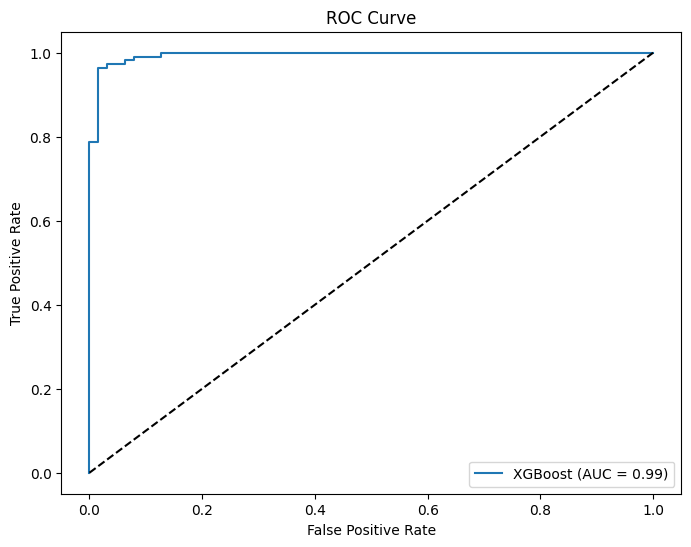

In [58]:
def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

plt.figure(figsize=(8, 6))
plot_roc_curve(xgb_model, X_test, y_test, 'XGBoost')
plt.show()